[slides used](https://drive.google.com/file/d/1i5poZ7fMY2yUnKT8FFAW0yddBUYZcQzN/view?usp=sharing)

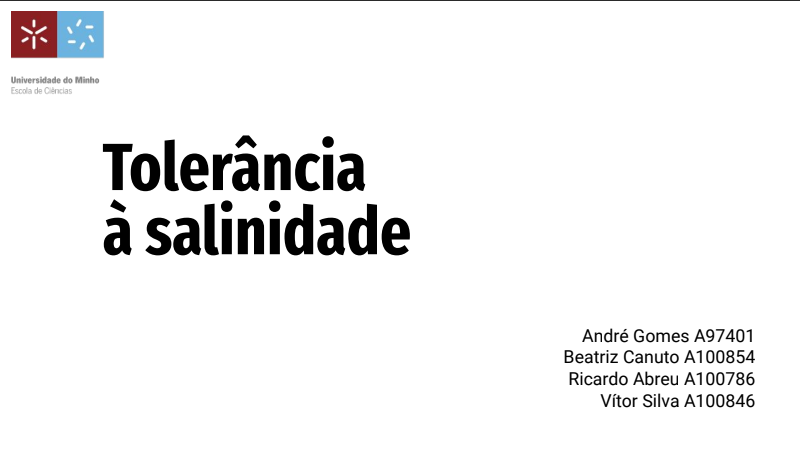

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [11]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


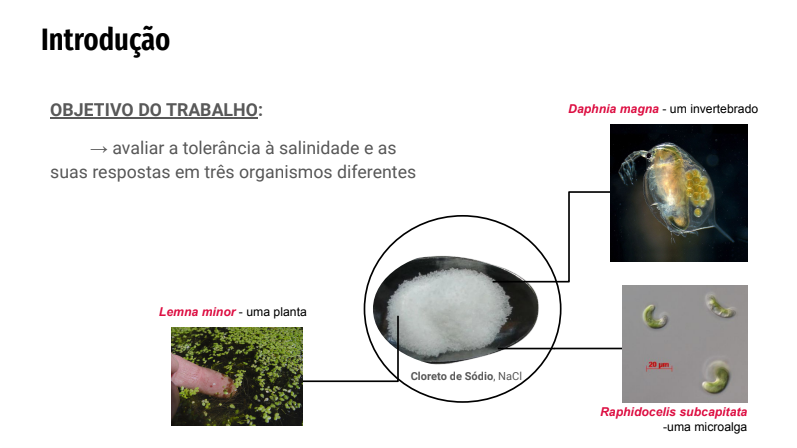

Para cada um, fez-se variar a concentração de sal (atributo `Conc`).

Para a planta (Lemna minor) contou-se o número de frondes (`Frondes`) e mediu-se a área (`Area)`, usando ImageJ.

In [1]:
filepath = './my_data/salinity_tolerance.xlsx'

In [15]:
lemna_df = pd.read_excel(filepath, sheet_name="Lemna", header=1)
# default is header=0 and column names are inferred from the first non-blank line of the file, 
# if column names are passed explicitly then the behavior is identical to header=None
# If the header is in a row other than the first, pass the row number to header. This will skip the preceding rows
lemna_df

,Conc,Frondes,Area
0,0.0,9,0.352
1,0.0,7,0.295
2,0.0,7,0.266
3,0.0,7,0.278
4,0.0,8,0.352
5,0.0,9,0.316
6,1.1,8,0.256
7,1.1,9,0.355
8,1.1,8,0.333
9,1.7,9,0.283


In [16]:
lemna_df.dtypes

Conc       float64
Frondes      int64
Area       float64
dtype: object

However, for convinience we treated `Conc` as a categorical variable

In [21]:
# Convert the 'Conc' column to a categorical (factor-like) variable
lemna_df['conc2'] = lemna_df['Conc'].astype('category')
lemna_df.head()

,Conc,Frondes,Area,conc2
0,0.0,9,0.352,0.0
1,0.0,7,0.295,0.0
2,0.0,7,0.266,0.0
3,0.0,7,0.278,0.0
4,0.0,8,0.352,0.0


In [22]:
lemna_df.dtypes

Conc        float64
Frondes       int64
Area        float64
conc2      category
dtype: object

In [24]:
lemna_df['conc2'].unique()

[0.0, 1.1, 1.7, 2.6, 4.1, 6.4, 10.0]
Categories (7, float64): [0.0, 1.1, 1.7, 2.6, 4.1, 6.4, 10.0]

Depois, queriamos realizer uma ANOVA relativamente ao `Frondes`

In [27]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.8 MB 6.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 7.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.8 MB 8.2 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.8 MB 8.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.8 MB 8.9 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 6.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
# Perform ANOVA using OLS (ordinary least squares) model
model = ols('Frondes ~ C(conc2)', data=lemna_df).fit()

# provides the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(conc2),157.166667,6.0,22.081267,3.796737e-07
Residual,20.166667,17.0,NaN,NaN


Como o valor p bastante reduzido (coluna `Pr(>F)` na tabela), estes resultados indicam que a ANOVA é significativa. Ou seja, existe uma relação estatisticamente significativa entre a concentração da soluçao e o número de frondes.

In [34]:
import matplotlib.pyplot as plt

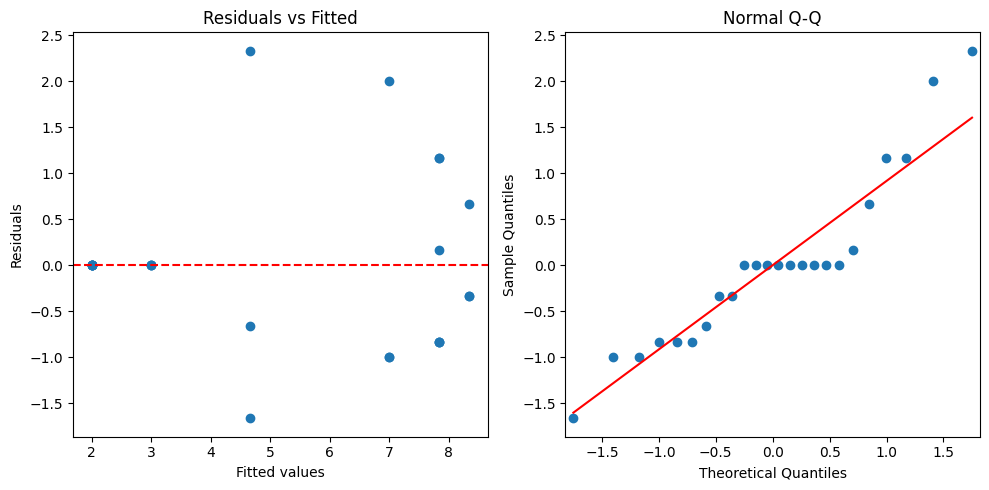

In [35]:
# Plot residuals
# Residual plot 1: Homogeneity of variance check
plt.figure(figsize=(10, 5))

# Subplot 1: Residual vs Fitted values (homogeneity check)
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Subplot 2: Q-Q plot (normality check)
plt.subplot(1, 2, 2)
sm.qqplot(model.resid, line='s', ax=plt.gca())
plt.title('Normal Q-Q')

plt.tight_layout()
plt.show()

Nestes gráficos podemos aferir se os requesitos do teste são satisfeitos: o primeiro dá-nos informação acerca da homogeneidade de variâncias e o segundo acerca da normalidade.

Não temos homogeneidade de variâncias pelo que o teste não é o mais indicado. No entanto, vamos continuar a realizar a análise usando este teste e depois no final comparar com o resultado usando um teste não-paramétrico mais indicado.

Para visualização podemos usar o `seaborn`

In [36]:
import seaborn as sns

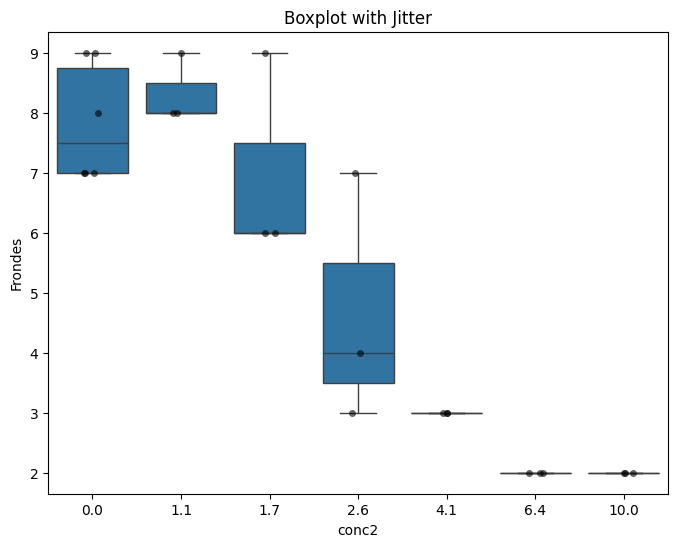

In [39]:
# Plot Boxplot with Jitter (like ggplot in R)
plt.figure(figsize=(8, 6))
sns.boxplot(x='conc2', y='Frondes', data=lemna_df)
sns.stripplot(x='conc2', y='Frondes', data=lemna_df, jitter=True, color='black', alpha=0.6)
plt.title('Boxplot with Jitter')
plt.show()

Nestas caixas de bigodes vemos que à medida que a concentração aumenta, o numero de frondes diminui.

Mas a relação entre as duas variáveis não é linear - o numero de frondes diminui apenas a partir de um valor limite de tolerância á salinidade.
Para descrever formalmente (estatisticamente) quando essa transição ocorre utiliza-se um teste post-hoc de "multiple comparison procedures"

In [41]:
from statsmodels.stats.multicomp import MultiComparison

In [46]:
# Perform Dunnett's test equivalent using pairwise comparisons
# Here, we compare each group to the 'low' category as a control
multi_comp = MultiComparison(lemna_df['Frondes'], lemna_df['conc2'])
dunnett_test = multi_comp.tukeyhsd()
print("\nTukey HSD (used here as a substitute for Dunnett's Test):")
print(dunnett_test)


Tukey HSD (used here as a substitute for Dunnett's Test):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.1      0.5 0.9938 -2.0621  3.0621  False
   0.0    1.7  -0.8333 0.9251 -3.3955  1.7288  False
   0.0    2.6  -3.1667 0.0105 -5.7288 -0.6045   True
   0.0    4.1  -4.8333 0.0001 -7.3955 -2.2712   True
   0.0    6.4  -5.8333    0.0 -8.3955 -3.2712   True
   0.0   10.0  -5.8333    0.0 -8.3955 -3.2712   True
   1.1    1.7  -1.3333 0.7417 -4.2918  1.6251  False
   1.1    2.6  -3.6667 0.0102 -6.6251 -0.7082   True
   1.1    4.1  -5.3333 0.0002 -8.2918 -2.3749   True
   1.1    6.4  -6.3333    0.0 -9.2918 -3.3749   True
   1.1   10.0  -6.3333    0.0 -9.2918 -3.3749   True
   1.7    2.6  -2.3333 0.1792 -5.2918  0.6251  False
   1.7    4.1     -4.0 0.0048 -6.9585 -1.0415   True
   1.7    6.4     -5.0 0.0005 -7.9585 -2.0415   True
   1.7   10.0     -5.0 0.0005 -7.9585 -2

Em particular este método de Dunnett permite-nos dizer que é significativamente diferente do controlo a partir de concentração 2.6 g/L. (Valor a partir do qual a coluna `reject` está toda a Falso)

O processo é o mesmo para as outras duas espécies e para cada uma das variáveis de estudo, tendo-se realizado ANOVAs em relação à concentração

Para a alga (Raphidocelis subcapitata) mediu-se a absorvância a 440 nm

In [25]:
algae_df = pd.read_excel(filepath, sheet_name="Algas", header=1)
algae_df.head()

,Conc,ABS 440
0,0.0,0.074
1,0.0,0.072
2,0.0,0.079
3,0.0,0.092
4,2.1,0.073


Para o invertebrado (Daphnia magna), se morreu ou não (`Mort`) e o número de filhos (`Reprod`).

In [26]:
daphnia_df = pd.read_excel(filepath, sheet_name="Daphnia", header=1)
daphnia_df.head()

,Conc,Mort,Reprod
0,0.0,0.0,0.0
1,0.0,0.0,15.0
2,0.0,0.0,13.0
3,0.0,0.0,8.0
4,0.0,NaN,NaN


Neste haviam alguma valores em falta. A decisão foi ignorar esses registos